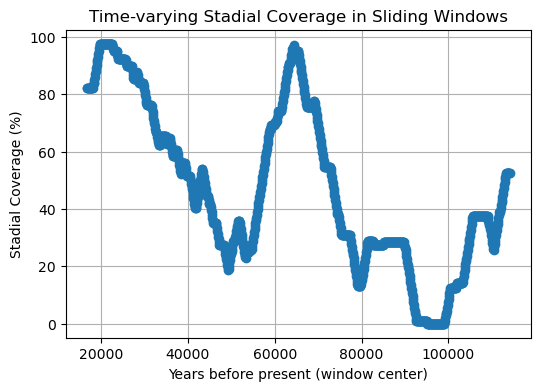

Max window center:  114140.0
Min window center:  16740.0


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Store the age data in a pandas DataFrame.
data = {
    "event": ["GS-1", "GS-2.1c", "GS-2.2", "GS-3", "GS-4", "GS-5.1", "GS-5.2", "GS-6", "GS-7", "GS-8",
              "GS-9", "GS-10", "GS-11", "GS-12", "GS-13", "GS-14", "GS-15.1", "GS-15.2", "GS-16.1", "GS-16.2",
              "GS-17.1", "GS-17.2", "GS-18", "GS-19.1", "GS-19.2", "GS-20", "GS-21.1", "GS-21.2", "GS-22",
              "GS-23.1", "GS-23.2", "GS-24.1", "GS-24.2", "GS-25", "GS-26"],
    "end":   [11703, 14692, 23020, 23340, 27780, 28900, 30840, 32500, 33740, 35480,
              38220, 40160, 41460, 43340, 46860, 49280, 54220, 55000, 55800, 58040,
              58280, 59080, 59440, 64100, 69620, 72340, 76440, 84760, 85060, 90040,
              104040, 104520, 106750, 108280, 115370],
    "start": [12896, 22900, 23220, 27540, 28600, 30600, 32040, 33360, 34740, 36580,
              39900, 40800, 42240, 44280, 48340, 49600, 54900, 55400, 56500, 58160,
              58560, 59300, 63840, 69400, 70380, 74100, 77760, 84960, 87600, 90140,
              104380, 105440, 106900, 110640, 119140]
}

df = pd.DataFrame(data)

# 2. Set the sliding window parameters.
L_win = 10000  # window length in years
S_step = 100  # sliding step in years

# Determine the overall time span of the stadial events.
overall_older = df["start"].max()    # oldest, e.g., 119140 years before present
overall_recent = df["end"].min()       # most recent, e.g., 11703 years before present


w_old_values = np.arange(overall_older, overall_recent + L_win - 1, -S_step)

# Prepare lists to store the window centers and the stadial percentage.
window_centers = []
stadial_percentages = []

# For each sliding window, calculate the total overlapping duration.
for w_old in w_old_values:
    w_recent = w_old - L_win  # the younger boundary of the window
    # Compute the window center (for plotting)
    win_center = w_old - L_win / 2
    
    total_overlap = 0.0
    # For each stadial event, compute the overlap with the current window.
    for idx, row in df.iterrows():
        # Event interval is [event_end, event_start]
        event_end = row["end"]
        event_start = row["start"]
        # Calculate overlap: 
        overlap = max(0, min(w_old, event_start) - max(w_recent, event_end))
        total_overlap += overlap
        
    # Percentage of the window covered by stadials:
    pct = (total_overlap / L_win) * 100
    window_centers.append(win_center)
    stadial_percentages.append(pct)

# 3. Plot the time series of the stadial percentage.
plt.figure(figsize=(6, 4))
plt.plot(window_centers, stadial_percentages, marker='o', linestyle='-')
plt.xlabel("Years before present (window center)")
plt.ylabel("Stadial Coverage (%)")
plt.title("Time-varying Stadial Coverage in Sliding Windows")
plt.grid(True)
# Invert the x-axis so that older times (larger values) appear on the left.
# plt.gca().invert_xaxis()
plt.show()

# print max window center 
print("Max window center: ", max(window_centers))
print("Min window center: ", min(window_centers))


In [46]:
window_centers

[114140.0,
 114040.0,
 113940.0,
 113840.0,
 113740.0,
 113640.0,
 113540.0,
 113440.0,
 113340.0,
 113240.0,
 113140.0,
 113040.0,
 112940.0,
 112840.0,
 112740.0,
 112640.0,
 112540.0,
 112440.0,
 112340.0,
 112240.0,
 112140.0,
 112040.0,
 111940.0,
 111840.0,
 111740.0,
 111640.0,
 111540.0,
 111440.0,
 111340.0,
 111240.0,
 111140.0,
 111040.0,
 110940.0,
 110840.0,
 110740.0,
 110640.0,
 110540.0,
 110440.0,
 110340.0,
 110240.0,
 110140.0,
 110040.0,
 109940.0,
 109840.0,
 109740.0,
 109640.0,
 109540.0,
 109440.0,
 109340.0,
 109240.0,
 109140.0,
 109040.0,
 108940.0,
 108840.0,
 108740.0,
 108640.0,
 108540.0,
 108440.0,
 108340.0,
 108240.0,
 108140.0,
 108040.0,
 107940.0,
 107840.0,
 107740.0,
 107640.0,
 107540.0,
 107440.0,
 107340.0,
 107240.0,
 107140.0,
 107040.0,
 106940.0,
 106840.0,
 106740.0,
 106640.0,
 106540.0,
 106440.0,
 106340.0,
 106240.0,
 106140.0,
 106040.0,
 105940.0,
 105840.0,
 105740.0,
 105640.0,
 105540.0,
 105440.0,
 105340.0,
 105240.0,
 105140.0,

In [47]:
new_x

array([97400., 97300., 97200., 97100., 97000., 96900., 96800., 96700.,
       96600., 96500., 96400., 96300., 96200., 96100., 96000., 95900.,
       95800., 95700., 95600., 95500., 95400., 95300., 95200., 95100.,
       95000., 94900., 94800., 94700., 94600., 94500., 94400., 94300.,
       94200., 94100., 94000., 93900., 93800., 93700., 93600., 93500.,
       93400., 93300., 93200., 93100., 93000., 92900., 92800., 92700.,
       92600., 92500., 92400., 92300., 92200., 92100., 92000., 91900.,
       91800., 91700., 91600., 91500., 91400., 91300., 91200., 91100.,
       91000., 90900., 90800., 90700., 90600., 90500., 90400., 90300.,
       90200., 90100., 90000., 89900., 89800., 89700., 89600., 89500.,
       89400., 89300., 89200., 89100., 89000., 88900., 88800., 88700.,
       88600., 88500., 88400., 88300., 88200., 88100., 88000., 87900.,
       87800., 87700., 87600., 87500., 87400., 87300., 87200., 87100.,
       87000., 86900., 86800., 86700., 86600., 86500., 86400., 86300.,
      

Max x_sorted:  114140.0
Min x_sorted:  16740.0


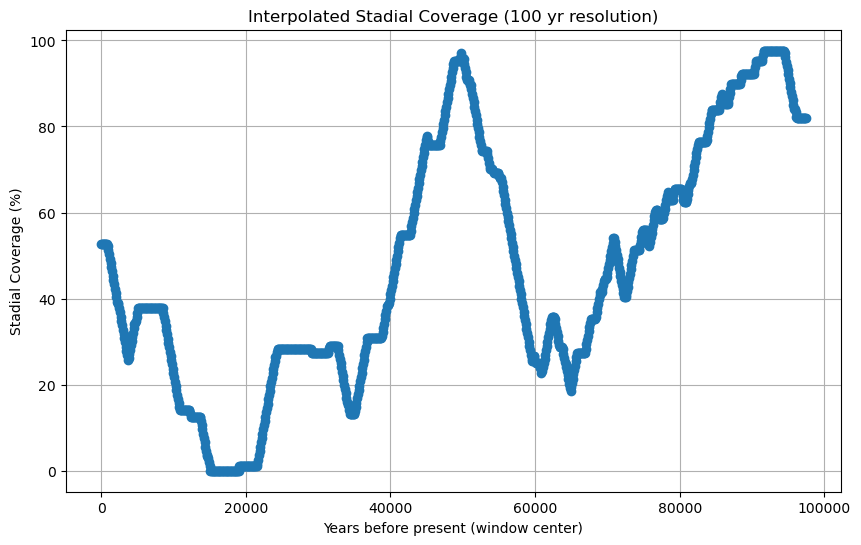

Max of new_x:  97400.0
Min of new_x:  0.0
Length of new_x:  975


In [49]:
import numpy as np
import matplotlib.pyplot as plt


# Convert lists to numpy arrays
window_centers = np.array(window_centers)
stadial_percentages = np.array(stadial_percentages)

# For interpolation, sort the data in ascending order (from most recent to oldest)
sort_idx = np.argsort(window_centers)
x_sorted = window_centers[sort_idx]
y_sorted = stadial_percentages[sort_idx]

# Create a new time axis with 100-year resolution.
# new_x will range from the minimum to the maximum window center (in years before present)
new_x = np.arange(x_sorted[0], x_sorted[-1] + 1, 100)

# print max x_sorted
print("Max x_sorted: ", max(x_sorted))
print("Min x_sorted: ", min(x_sorted))



# Perform linear interpolation to get the new y values.
new_y = np.interp(new_x, x_sorted, y_sorted)

new_x=(new_x-max(new_x))*-1
new_x=abs(new_x)

# Plot the interpolated time series.
plt.figure(figsize=(10, 6))
plt.plot(new_x, new_y, marker='o', linestyle='-')
plt.xlabel("Years before present (window center)")
plt.ylabel("Stadial Coverage (%)")
plt.title("Interpolated Stadial Coverage (100 yr resolution)")
plt.grid(True)
# Invert the x-axis so that older times (larger values) appear on the left.
# plt.gca().invert_xaxis()
plt.show()

# print the max and min of the new_x
print("Max of new_x: ", max(new_x))
print("Min of new_x: ", min(new_x))
# print the length of new_x
print("Length of new_x: ", len(new_x))

# save the interpolated data to a CSV file under /output
df_stadial_duration_SlidingWindow = pd.DataFrame({"age": new_x, "percentage": new_y})
df_stadial_duration_SlidingWindow.to_csv("output/df_stadial_duration_SlidingWindow.csv", index=False)

In [42]:
# read the data from the CSV file
df_stadial_duration_SlidingWindow = pd.read_csv("output/df_stadial_duration_SlidingWindow.csv")
df_stadial_duration_SlidingWindow

,age,percentage
0,97400.0,82.04
1,97300.0,82.04
2,97200.0,82.04
3,97100.0,82.04
4,97000.0,82.04
...,...,...
970,400.0,52.70
971,300.0,52.70
972,200.0,52.70
973,100.0,52.70
